In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import cv2
%matplotlib qt

In [2]:
m = np.array([[1,1,0,1,1,1,0,1],[1,1,0,1,0,1,0,1],[1,1,1,1,0,0,0,1],[0,0,0,0,0,0,0,1],[1,1,1,1,0,1,0,1],[0,0,0,1,0,1,0,1],[1,1,1,1,0,0,0,1],[1,1,1,1,0,1,1,1], [1,1,1,1,0,1,1,1]]).astype(float)

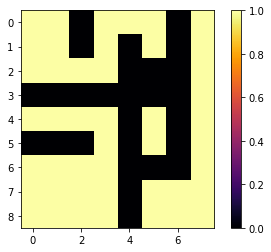

In [3]:
c = plt.imshow(m, cmap = 'inferno')
plt.colorbar(c)

In [4]:
def m_ij(m, i, j):
    rows, cols = m.shape
    m_i_j = 0
    for row in range(rows):
        for col in range(cols):
            m_i_j += np.power(row + 1, i) * np.power(col + 1, j) * m[row][col]
    
    return m_i_j

def centroid(m):
    m00 = m_ij(m, 0, 0)
    return [m_ij(m, 1, 0) / m00, m_ij(m, 0, 1) / m00]

def u_ij(m, i, j):
    rows, cols = m.shape
    m_i_j = 0
    x_, y_ = centroid(m)
    for row in range(rows):
        for col in range(cols):
            m_i_j += np.power(row + 1 - x_, i) * np.power(col + 1 - y_, j) * m[row][col]
    return m_i_j

def hu_Moments(m):
    u_00 = u_ij(m, 0, 0)
    
    eta = lambda m, i, j : u_ij(m, i, j) / np.power(u_00, (i + j) / 2 + 1)
    
    eta_20 = eta(m, 2, 0)
    eta_02 = eta(m, 0, 2)
    eta_11 = eta(m, 1, 1)
    eta_30 = eta(m, 3, 0)
    eta_12 = eta(m, 1, 2)
    eta_21 = eta(m, 2, 1)
    eta_03 = eta(m, 0, 3)
    
    phi_1 = eta_20 + eta_02
    phi_2 = np.power(eta_20 - eta_02, 2) + 4 * np.power(eta_11, 2)
    phi_3 = np.power(eta_30 - 3 * eta_12, 2) + np.power(3 * eta_21 - eta_03, 2)
    phi_4 = np.power(eta_30 + eta_12, 2) + np.power(eta_21 + eta_03, 2)
    phi_5 = (eta_30 - 3 * eta_12) * (eta_30 + eta_12) * (np.power(eta_30 + eta_12, 2) - 3 * np.power(eta_21 + eta_03, 2)) + (3 * eta_21 - eta_03) * (eta_21 + eta_03) * (3 * np.power(eta_30 + eta_12, 2) - np.power(eta_21 - eta_03, 2))
    phi_6 = (eta_20 - eta_02) * (np.power(eta_30 + eta_12, 2) - np.power(eta_21 + eta_03, 2)) + 4 * eta_11 * (eta_30 + eta_12) * (eta_21 + eta_03)
    phi_7 = (3 * eta_21 - eta_03) * (eta_30 + eta_12) * (np.power(eta_30 - eta_12, 2) - 3 * np.power(eta_21 - eta_03, 2)) + (3 * eta_12 - eta_30) * (eta_21 + eta_03) * (3 * np.power(eta_30 - eta_12, 2) - np.power(eta_21 - eta_03, 2))
    
    return np.array([phi_1, phi_2, phi_3, phi_4, phi_5, phi_6, phi_7])

# Hu Moments by cv2

In [5]:
moments = cv2.moments(m)
huMoments = (cv2.HuMoments(moments))
print(huMoments.reshape(1,-1)[0])

[ 3.13481481e-01  1.57669624e-03  2.97204789e-04  2.68821098e-04
 -7.40737973e-08  7.18174009e-07 -1.69310785e-08]


# Hu Moments by own implementation

In [6]:
print(hu_Moments(m))

[ 3.13481481e-01  1.57669624e-03  2.97204789e-04  2.68821098e-04
 -6.75790086e-08  7.18174009e-07 -3.17668058e-08]
